In [118]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy

In [6]:
def get_reward(action , student_id ):
    alpha1 = int(str(student_id)[6:])%3 + 1
    beta1 = 5

    alpha2= 2
    beta2 = alpha1

    if action==1:

        stochastic_num1 = np.random.beta(alpha1, beta1 , size=None)
        reward = -stochastic_num1 *14 + 7
        return reward

    elif action ==2:
    
        stochastic_num1 = np.random.beta(alpha2, beta2 , size=None)
        reward = stochastic_num1 *14 - 7
        return reward

    else: 
        print('Action number must be 1 or 2!')

In [7]:
student_id = "810199135"
get_reward(2, student_id )

5.877223737353031

## Doctor's Policies

### DoctorA: Win-Stay-Lose-shift

In [8]:
def Doctor_A(student_id):
  
  action = 1
  
  rewardA = []
  actionA = []
  
  for i in range(100):
    ref  = 0
    r = get_reward(action, student_id)
    if r>0: #win
      if action == 1:
        action = random.choices([1, 2], weights=(0.8, 0.2), k = 1)[0]
      elif action == 2:
        action = random.choices([1, 2], weights=(0.2, 0.8), k = 1)[0]
    else: #lose
      if action == 1:
        action = random.choices([1, 2], weights=(0.3, 0.7), k = 1)[0]
      elif action == 2:
        action = random.choices([1, 2], weights=(0.7, 0.3), k = 1)[0]
    rewardA.append(r)
    actionA.append(action)
  return rewardA, actionA

### DoctorB: Random 

In [9]:
def Doctor_B( student_id):
  action = 1

  rewardB = []
  actionB = []

  for i in range(100):
    r = get_reward(action, student_id)
    action = random.choices([1, 2], weights=(0.5, 0.5), k = 1)[0]
    rewardB.append(r)
    actionB.append(action)
  return rewardB,actionB

### DoctorC: 

In [10]:
def Doctor_C( student_id):
  action = 1
  reward1 = []
  reward2 = []
  reward = []
  actionC = []
  for i in range(10):
    r1 = get_reward(1, student_id)
    reward1.append(r1)
    reward.append(r1)
    actionC.append(1)
    r2 = get_reward(2, student_id)
    reward2.append(r2)
    reward.append(r2)
    actionC.append(2)
  for i in range(8):
    for i in range(7):
      if np.mean(reward1)>np.mean(reward2):
        action = 1
        r = get_reward(action, student_id)
        reward1.append(r)
        actionC.append(1)
      elif np.mean(reward1)<np.mean(reward2):
        action = 2
        r = get_reward(action, student_id)
        reward2.append(r)
        actionC.append(2)
      reward.append(r)
    for i in range(3):
        action = random.choices([1, 2], weights=(0.5, 0.5), k = 1)[0]
        if action == 1:
          r = get_reward(action, student_id)
          reward1.append(r)
          actionC.append(1)
        elif action == 2 :
          r = get_reward(action, student_id)
          reward2.append(r)
          actionC.append(2)
        reward.append(r)
  return reward, actionC

In [105]:
rewardA, actionA = Doctor_A(student_id)
rewardB, actionB = Doctor_B(student_id)
rewardC, actionC = Doctor_C(student_id)

Calculating average reward with ave_reward funtion.

In [106]:
def ave_reward(reward):
  rewardcum = np.cumsum(reward)
  for i in range(100):
    rewardcum[i] = rewardcum[i]/(i+1)
  return rewardcum

In [107]:
def cum_reward(reward):
  rewardcum = np.cumsum(reward)
  return rewardcum

In [108]:
cumRewardA = cum_reward(rewardA)
cumRewardB = cum_reward(rewardB)
cumRewardC = cum_reward(rewardC)

In [109]:
aveRewardA = ave_reward(rewardA)
aveRewardB = ave_reward(rewardB)
aveRewardC = ave_reward(rewardC)

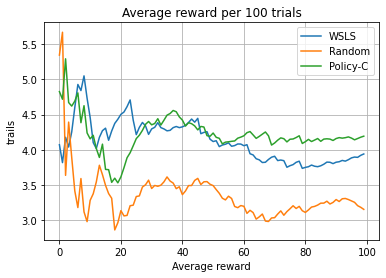

In [114]:
#average-reward
plt.plot(aveRewardA)
plt.plot(aveRewardB)
plt.plot(aveRewardC)
plt.grid()
plt.title("Average reward per 100 trials")
plt.legend(['WSLS', 'Random', 'Policy-C'])
plt.xlabel("Average reward")
plt.ylabel("trails");

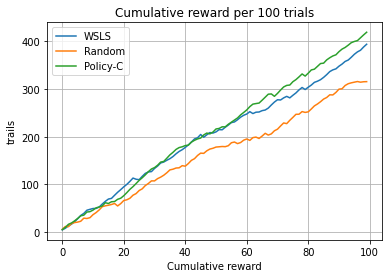

In [116]:
#cumulative-reward
plt.plot(cumRewardA)
plt.plot(cumRewardB)
plt.plot(cumRewardC)
plt.grid()
plt.title("Cumulative reward per 100 trials")
plt.legend(['WSLS', 'Random', 'Policy-C'])
plt.xlabel("Cumulative reward")
plt.ylabel("trails");

# Confidence Interval

In [119]:
def CI_function(reward):

  n = 100
  Xbar = np.mean(reward, axis = 0)
  s = np.std(reward, axis = 0)
  SE = s / np.sqrt(n)

  t_star = stats.t.ppf(1-0.025, 99)
  CI = t_star * SE
  return CI

## five iteration

In [129]:
def iteration_ave(func, iter):
  student_id = "810199135"
  reward_total = []
  for i in range(iter):
    reward, action = func(student_id)
    aveReward = ave_reward(reward)
    reward_total.append(aveReward)
  Xbar = np.mean(reward_total, axis = 0 )
  return reward_total, Xbar

In [130]:
def iteration_cum(func, iter):
  student_id = "810199135"
  reward_total = []
  for i in range(iter):
    reward, action = func(student_id)
    cumReward = cum_reward(reward)
    reward_total.append(cumReward)
  Xbar = np.mean(reward_total, axis = 0 )
  return reward_total, Xbar

In [131]:
def plot_CI(Xbar,  CI):
  fig, ax = plt.subplots(figsize=(20, 5))
  x = np.arange(1, 101, 1)
  y = Xbar
  ax.plot(x, y, color='k')
  ax.fill_between(x, (y-CI), (y+CI), color='b', alpha=.3)

### 5 iterations

In [132]:
rewardA_total_ave, XbarA_ave = iteration_ave(Doctor_A, 5)
rewardB_total_ave, XbarB_ave = iteration_ave(Doctor_B, 5)
rewardC_total_ave, XbarC_ave = iteration_ave(Doctor_C, 5)

rewardA_total_cum, XbarA_cum = iteration_cum(Doctor_A, 5)
rewardB_total_cum, XbarB_cum = iteration_cum(Doctor_B, 5)
rewardC_total_cum, XbarC_cum = iteration_cum(Doctor_C, 5)

In [133]:
CIA_ave = CI_function(rewardA_total_ave)
CIB_ave = CI_function(rewardB_total_ave)
CIC_ave = CI_function(rewardC_total_ave)

CIA_cum = CI_function(rewardA_total_cum)
CIB_cum = CI_function(rewardB_total_cum)
CIC_cum = CI_function(rewardC_total_cum)

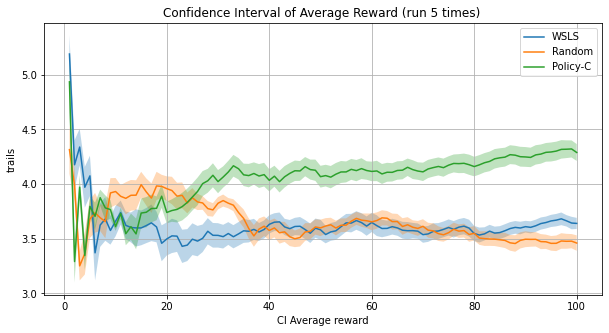

In [141]:
  fig, ax = plt.subplots(figsize=(10, 5))
  x = np.arange(1, 101, 1)
  #y = Xbar
  ax.plot(x, XbarA_ave)
  ax.fill_between(x, (XbarA_ave-CIA_ave), (XbarA_ave+CIA_ave), alpha=.3)
  ax.plot(x, XbarB_ave)
  ax.fill_between(x, (XbarB_ave-CIB_ave), (XbarB_ave+CIB_ave), alpha=.3)
  ax.plot(x, XbarC_ave)
  ax.fill_between(x, (XbarC_ave-CIC_ave), (XbarC_ave+CIC_ave), alpha=.3)
  plt.grid()
  plt.title("Confidence Interval of Average Reward (run 5 times) ")
  plt.legend(['WSLS', 'Random', 'Policy-C'])
  plt.xlabel("CI Average reward")
  plt.ylabel("trails");

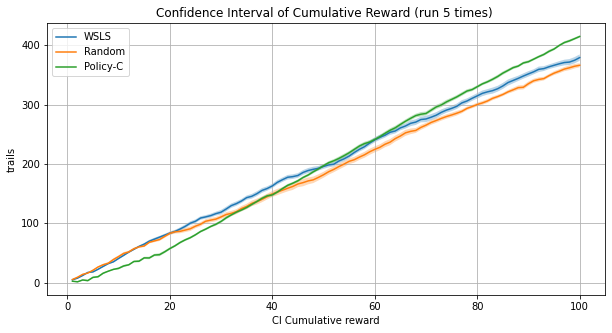

In [143]:
  fig, ax = plt.subplots(figsize=(10, 5))
  x = np.arange(1, 101, 1)
  #y = Xbar
  ax.plot(x, XbarA_cum)
  ax.fill_between(x, (XbarA_cum-CIA_cum), (XbarA_cum+CIA_cum), alpha=.3)
  ax.plot(x, XbarB_cum)
  ax.fill_between(x, (XbarB_cum-CIB_cum), (XbarB_cum+CIB_cum), alpha=.3)
  ax.plot(x, XbarC_cum)
  ax.fill_between(x, (XbarC_cum-CIC_cum), (XbarC_cum+CIC_cum), alpha=.3)
  plt.grid()
  plt.title("Confidence Interval of Cumulative Reward (run 5 times) ")
  plt.legend(['WSLS', 'Random', 'Policy-C'])
  plt.xlabel("CI Cumulative reward")
  plt.ylabel("trails");

## 20 iterations

In [144]:
rewardA_total_ave, XbarA_ave = iteration_ave(Doctor_A, 20)
rewardB_total_ave, XbarB_ave = iteration_ave(Doctor_B, 20)
rewardC_total_ave, XbarC_ave = iteration_ave(Doctor_C, 20)

rewardA_total_cum, XbarA_cum = iteration_cum(Doctor_A, 20)
rewardB_total_cum, XbarB_cum = iteration_cum(Doctor_B, 20)
rewardC_total_cum, XbarC_cum = iteration_cum(Doctor_C, 20)

In [145]:
CIA_ave = CI_function(rewardA_total_ave)
CIB_ave = CI_function(rewardB_total_ave)
CIC_ave = CI_function(rewardC_total_ave)

CIA_cum = CI_function(rewardA_total_cum)
CIB_cum = CI_function(rewardB_total_cum)
CIC_cum = CI_function(rewardC_total_cum)

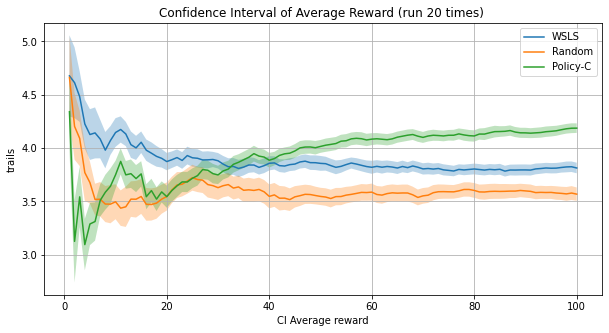

In [148]:
  fig, ax = plt.subplots(figsize=(10, 5))
  x = np.arange(1, 101, 1)
  #y = Xbar
  ax.plot(x, XbarA_ave)
  ax.fill_between(x, (XbarA_ave-CIA_ave), (XbarA_ave+CIA_ave), alpha=.3)
  ax.plot(x, XbarB_ave)
  ax.fill_between(x, (XbarB_ave-CIB_ave), (XbarB_ave+CIB_ave), alpha=.3)
  ax.plot(x, XbarC_ave)
  ax.fill_between(x, (XbarC_ave-CIC_ave), (XbarC_ave+CIC_ave), alpha=.3)
  plt.grid()
  plt.title("Confidence Interval of Average Reward (run 20 times) ")
  plt.legend(['WSLS', 'Random', 'Policy-C'])
  plt.xlabel("CI Average reward")
  plt.ylabel("trails");

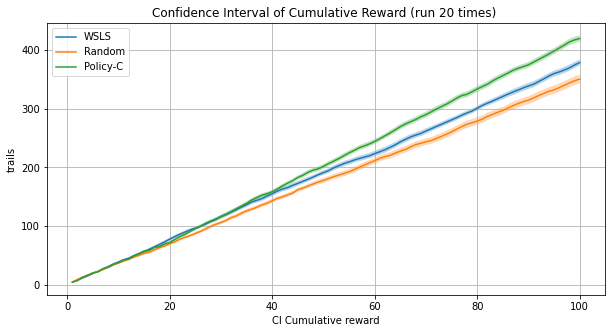

In [149]:
  fig, ax = plt.subplots(figsize=(10, 5))
  x = np.arange(1, 101, 1)
  #y = Xbar
  ax.plot(x, XbarA_cum)
  ax.fill_between(x, (XbarA_cum-CIA_cum), (XbarA_cum+CIA_cum), alpha=.3)
  ax.plot(x, XbarB_cum)
  ax.fill_between(x, (XbarB_cum-CIB_cum), (XbarB_cum+CIB_cum), alpha=.3)
  ax.plot(x, XbarC_cum)
  ax.fill_between(x, (XbarC_cum-CIC_cum), (XbarC_cum+CIC_cum), alpha=.3)
  plt.grid()
  plt.title("Confidence Interval of Cumulative Reward (run 20 times) ")
  plt.legend(['WSLS', 'Random', 'Policy-C'])
  plt.xlabel("CI Cumulative reward")
  plt.ylabel("trails");

## Q4

In [150]:
ave_rewardA_10 = []
ave_rewardB_10 = []
ave_rewardC_10 = []

for i in range(10):
    rA_10, aA_10 = Doctor_A(student_id)
    rB_10, aB_10 = Doctor_B(student_id)
    rC_10, aC_10 = Doctor_C(student_id)

    ave_rewardA_10.append(ave_reward(rA_10))
    ave_rewardB_10.append(ave_reward(rB_10))
    ave_rewardC_10.append(ave_reward(rC_10))

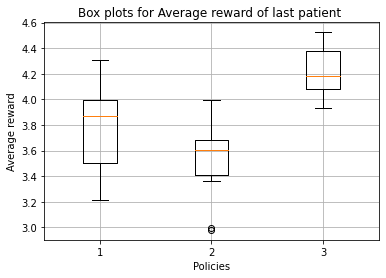

In [152]:
plt.boxplot(np.array([np.array(ave_rewardA_10)[:,-1], np.array(ave_rewardB_10)[:,-1], np.array(ave_rewardC_10)[:,-1]]).T)
plt.grid()
plt.title("Box plots for Average reward of last patient ")
plt.xlabel("Policies")
plt.ylabel("Average reward");

## Q5

In [154]:
reward1 = []
reward2 = []
for i in range(100):
    a1 = 1
    a2 = 2
    reward1.append(get_reward(a1 , student_id))
    reward2.append(get_reward(a2 , student_id))   
    
data = np.array([np.array(reward1), np.array(reward2)]).T

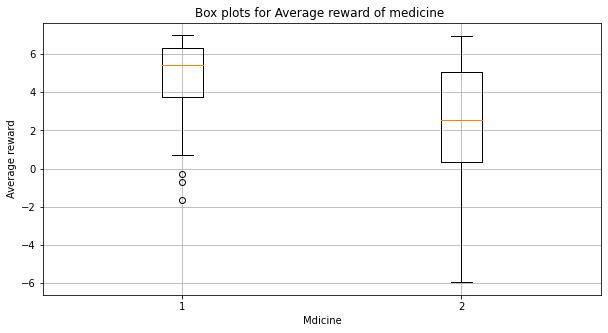

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.boxplot(data)
plt.grid()
plt.title("Box plots for Average reward of medicine ")
plt.xlabel("Mdicine")
plt.ylabel("Average reward");

In [156]:
n = 100
alpha = 0.05

mean_reward1 = np.mean(reward1)
var_reward1 = np.var(reward1)
mean_reward2 = np.mean(reward2)
var_reward2 = np.var(reward2)

z_score = (mean_reward1 - mean_reward2) / np.sqrt((var_reward1 + var_reward2) / n)
print(z_score)

6.929070617284522


In [157]:
p_value = scipy.stats.norm.sf(abs(z_score))
print('p value is : ' + str(p_value))

p value is : 2.1180715981993407e-12
